In [1]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from konlpy.tag import Okt
okt = Okt()

ModuleNotFoundError: No module named 'konlpy'

In [2]:
openFileName = '전자담배 증상_naver_news_761.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
data = ''

for item in jsonData:
    if 'description' in item.keys():
        data = data + re.sub(r'[^\w]', ' ', item['description']) + ' '

# f.close()

In [ ]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]


In [ ]:
data=tokenizer(data)

In [3]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [4]:
print(X)

  (0, 2883)	1
  (0, 2427)	1
  (0, 4509)	1
  (0, 5260)	1
  (0, 863)	1
  (0, 2791)	1
  (0, 1024)	1
  (0, 5140)	1
  (0, 2829)	1
  (0, 6072)	1
  (0, 1063)	1
  (0, 2742)	2
  (0, 409)	1
  (0, 1437)	1
  (0, 316)	1
  (0, 803)	1
  (0, 1085)	1
  (0, 4906)	1
  (0, 2521)	1
  (0, 369)	1
  (0, 4114)	1
  (0, 259)	1
  (0, 4535)	1
  (0, 4716)	1
  (0, 2860)	1
  :	:
  (0, 5508)	1
  (0, 3716)	1
  (0, 2914)	1
  (0, 4648)	7
  (0, 4297)	12
  (0, 4563)	12
  (0, 714)	3
  (0, 3759)	1
  (0, 627)	3
  (0, 1109)	54
  (0, 2003)	3
  (0, 2259)	1
  (0, 4774)	909
  (0, 5488)	1
  (0, 296)	1
  (0, 5085)	1
  (0, 5994)	1
  (0, 2871)	4
  (0, 5995)	2
  (0, 2688)	2
  (0, 2546)	1
  (0, 5134)	830
  (0, 441)	7
  (0, 1601)	1
  (0, 4280)	1


In [5]:
print(vectorize.vocabulary_)

{'의학적으로는': 4280, '다섯': 1601, '가지': 441, '증상': 5134, '복부': 2546, '비만': 2688, '혈압': 5995, '상승': 2871, '혈당': 5994, '중성지방': 5085, 'hdl': 296, '콜레스테롤': 5488, '전자담배': 4774, '바꾸고': 2259, '마치': 2003, '금연을': 1109, '것처럼': 627, '여기는': 3759, '경향이': 714, '있는데': 4563, '이는': 4297, '잘못된': 4648, '생각이다': 2914, '업체에서는': 3716, '타르가': 5508, '당화반응은': 1662, '당뇨병': 1653, '환자뿐': 6094, '아니라': 3401, '정상인에게도': 4839, '다음과': 1609, '같은': 529, '여러': 3762, '질병과': 5207, '유발할': 4130, '특히': 5559, '요즈음': 3993, '젊은이들이': 4794, '사용하는': 2811, '에도': 3748, '들어': 1860, '있다': 4566, '적은': 4719, '양이라도': 3643, '포름알데히드에': 5646, '장기간': 4657, '라이트에이드는': 1955, '판매를': 5579, '중단하겠다고': 5063, '발표했었다': 2376, '권용욱': 953, '기자': 1212, '왕좌의': 3978, '게임': 630, '최종': 5379, '시즌에': 3247, '매체는': 2084, '세계에서': 3026, '진행': 5195, '중인': 5099, '마약중독': 1987, '개선을': 542, '위한': 4077, 'dbs': 279, '임상시험': 4522, '8건': 239, '6건이': 219, '중국에서': 5059, '시행': 3251, '금연': 1050, '초기': 5342, '목과': 2139, '등에': 1882, '과민': 809, '반응을': 2303, '보이거나': 2510, '집중력이': 5224, '떨

In [6]:
print(X.toarray())

[[1 2 1 ... 1 1 1]]


In [7]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0.00067284 0.00134567 0.00067284 ... 0.00067284 0.00067284 0.00067284]]


In [8]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'의학적으로는': 1,
 '다섯': 1,
 '가지': 7,
 '증상': 830,
 '복부': 1,
 '비만': 2,
 '혈압': 2,
 '상승': 4,
 '혈당': 1,
 '중성지방': 1,
 'hdl': 1,
 '콜레스테롤': 1,
 '전자담배': 909,
 '바꾸고': 1,
 '마치': 3,
 '금연을': 54,
 '것처럼': 3,
 '여기는': 1,
 '경향이': 3,
 '있는데': 12,
 '이는': 12,
 '잘못된': 7,
 '생각이다': 1,
 '업체에서는': 1,
 '타르가': 1,
 '당화반응은': 1,
 '당뇨병': 4,
 '환자뿐': 1,
 '아니라': 13,
 '정상인에게도': 1,
 '다음과': 3,
 '같은': 69,
 '여러': 9,
 '질병과': 1,
 '유발할': 10,
 '특히': 44,
 '요즈음': 2,
 '젊은이들이': 1,
 '사용하는': 23,
 '에도': 17,
 '들어': 19,
 '있다': 172,
 '적은': 5,
 '양이라도': 1,
 '포름알데히드에': 7,
 '장기간': 4,
 '라이트에이드는': 1,
 '판매를': 2,
 '중단하겠다고': 1,
 '발표했었다': 1,
 '권용욱': 1,
 '기자': 21,
 '왕좌의': 1,
 '게임': 1,
 '최종': 1,
 '시즌에': 1,
 '매체는': 1,
 '세계에서': 1,
 '진행': 3,
 '중인': 7,
 '마약중독': 1,
 '개선을': 1,
 '위한': 13,
 'dbs': 1,
 '임상시험': 2,
 '8건': 1,
 '6건이': 1,
 '중국에서': 1,
 '시행': 2,
 '금연': 133,
 '초기': 27,
 '목과': 2,
 '등에': 7,
 '과민': 5,
 '반응을': 3,
 '보이거나': 2,
 '집중력이': 2,
 '떨어지는': 2,
 '나타나는데': 3,
 '이용자들은': 2,
 '이런': 30,
 '증세가': 2,
 '덜했다고': 2,
 '연구진은': 2,
 '설명했다': 7,
 '하지만': 49,
 '이용자의': 4,
 '80

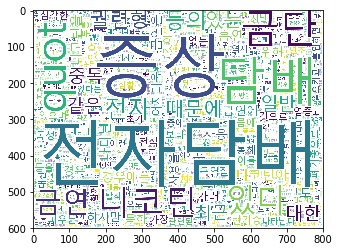

In [9]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [10]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'의학적으로는': 4280, '다섯': 1601, '가지': 441, '증상': 5134, '복부': 2546, '비만': 2688, '혈압': 5995, '상승': 2871, '혈당': 5994, '중성지방': 5085, 'hdl': 296, '콜레스테롤': 5488, '전자담배': 4774, '바꾸고': 2259, '마치': 2003, '금연을': 1109, '것처럼': 627, '여기는': 3759, '경향이': 714, '있는데': 4563, '이는': 4297, '잘못된': 4648, '생각이다': 2914, '업체에서는': 3716, '타르가': 5508, '당화반응은': 1662, '당뇨병': 1653, '환자뿐': 6094, '아니라': 3401, '정상인에게도': 4839, '다음과': 1609, '같은': 529, '여러': 3762, '질병과': 5207, '유발할': 4130, '특히': 5559, '요즈음': 3993, '젊은이들이': 4794, '사용하는': 2811, '에도': 3748, '들어': 1860, '있다': 4566, '적은': 4719, '양이라도': 3643, '포름알데히드에': 5646, '장기간': 4657, '라이트에이드는': 1955, '판매를': 5579, '중단하겠다고': 5063, '발표했었다': 2376, '권용욱': 953, '기자': 1212, '왕좌의': 3978, '게임': 630, '최종': 5379, '시즌에': 3247, '매체는': 2084, '세계에서': 3026, '진행': 5195, '중인': 5099, '마약중독': 1987, '개선을': 542, '위한': 4077, 'dbs': 279, '임상시험': 4522, '8건': 239, '6건이': 219, '중국에서': 5059, '시행': 3251, '금연': 1050, '초기': 5342, '목과': 2139, '등에': 1882, '과민': 809, '반응을': 2303, '보이거나': 2510, '집중력이': 5224, '떨

In [11]:
freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'의학적으로는': 0.0006728370654508128,
 '다섯': 0.0006728370654508128,
 '가지': 0.00470985945815569,
 '증상': 0.5584547643241746,
 '복부': 0.0006728370654508128,
 '비만': 0.0013456741309016255,
 '혈압': 0.0013456741309016255,
 '상승': 0.002691348261803251,
 '혈당': 0.0006728370654508128,
 '중성지방': 0.0006728370654508128,
 'hdl': 0.0006728370654508128,
 '콜레스테롤': 0.0006728370654508128,
 '전자담배': 0.6116088924947888,
 '바꾸고': 0.0006728370654508128,
 '마치': 0.0020185111963524384,
 '금연을': 0.03633320153434389,
 '것처럼': 0.0020185111963524384,
 '여기는': 0.0006728370654508128,
 '경향이': 0.0020185111963524384,
 '있는데': 0.008074044785409754,
 '이는': 0.008074044785409754,
 '잘못된': 0.00470985945815569,
 '생각이다': 0.0006728370654508128,
 '업체에서는': 0.0006728370654508128,
 '타르가': 0.0006728370654508128,
 '당화반응은': 0.0006728370654508128,
 '당뇨병': 0.002691348261803251,
 '환자뿐': 0.0006728370654508128,
 '아니라': 0.008746881850860566,
 '정상인에게도': 0.0006728370654508128,
 '다음과': 0.0020185111963524384,
 '같은': 0.04642575751610608,
 '여러': 0.00605553358905

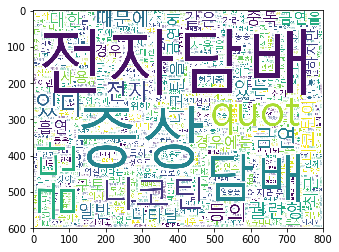

In [12]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()